# Exploratory Analysis and Data Preprocessing

In [24]:
# Load the dataset
import pandas as pd

data = pd.read_csv(r'C:\Users\Kanika Barik\projects\Classification-of-Alzheimer-s-Disease\alzheimers_disease_data.csv')

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

(None,
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
 0       4751   73       0          0               2  22.927749        0   
 1       4752   89       0          0               0  26.827681        0   
 2       4753   73       0          3               1  17.795882        0   
 3       4754   74       1          0               1  33.800817        1   
 4       4755   89       0          0               0  20.716974        0   
 
    AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
 0           13.297218          6.327112     1.347214  ...                 0   
 1            4.542524          7.619885     0.518767  ...                 0   
 2           19.555085          7.844988     1.826335  ...                 0   
 3           12.209266          8.428001     7.435604  ...                 0   
 4           18.454356          6.310461     0.795498  ...                 0   
 
    BehavioralProblems       ADL  Confusion  Di

The dataset contains 35 columns with a mix of numerical and categorical data. Here's a summary:

Target Variable: Diagnosis (likely 0 for no Alzheimer's, 1 for Alzheimer's).
Features: Includes demographics (e.g., Age, Gender), lifestyle factors (e.g., Smoking, AlcoholConsumption), medical data (e.g., CholesterolTotal, MMSE), and behavioral issues.
Non-Predictive Columns: PatientID (identifier) and DoctorInCharge (likely confidential and non-predictive).

# Train-Test Split

In [25]:
# Drop non-predictive columns
data_cleaned = data.drop(columns=['PatientID', 'DoctorInCharge'])

# Check class distribution of the target variable
class_distribution = data_cleaned['Diagnosis'].value_counts(normalize=True)

# Display class distribution
class_distribution


Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

The dataset is slightly imbalanced:

No Alzheimer's (0): 64.63% of cases.
Alzheimer's (1): 35.37% of cases.
To address this imbalance during modeling, we can use techniques such as oversampling (e.g., SMOTE), undersampling, or class weighting.

Encode categorical features if needed, scale numerical features for models sensitive to scaling, and then split the dataset into training and testing sets.


In [26]:
# Install scikit-learn
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes to confirm split and scaling
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


((1719, 32), (430, 32), (1719,), (430,))

The dataset has been successfully split into training and testing sets, with numerical features scaled:

- **Training Set:** 1,719 samples
- **Testing Set:** 430 samples
- **Number of Features:** 32 (after excluding non-predictive columns)

# Model Selection and Training

Next Steps: We'll train and evaluate a series of classification models. The process will include:

1. **Logistic Regression**: Start with this model for a straightforward approach to classification.
2. **Random Forest**: Use this ensemble method to improve predictive performance.
3. **Support Vector Machines (SVM)**: Employ this powerful model for complex classification tasks.
4. **Gradient Boosting (e.g., XGBoost)**: Apply this method for robust and efficient classification.

## Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced')
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_classification_report = classification_report(y_test, y_pred)
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("\nClassification Report:\n", log_reg_classification_report)
print("\nConfusion Matrix:\n", log_reg_confusion_matrix)


Logistic Regression Accuracy: 0.8162790697674419

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       278
           1       0.70      0.86      0.77       152

    accuracy                           0.82       430
   macro avg       0.80      0.83      0.81       430
weighted avg       0.83      0.82      0.82       430


Confusion Matrix:
 [[221  57]
 [ 22 130]]


## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:\n", rf_classification_report)
print("\nConfusion Matrix:\n", rf_confusion_matrix)


Random Forest Accuracy: 0.9279069767441861

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       278
           1       0.94      0.85      0.89       152

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430


Confusion Matrix:
 [[270   8]
 [ 23 129]]


## Support Vector Machine

In [29]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report:\n", svm_classification_report)
print("\nConfusion Matrix:\n", svm_confusion_matrix)


SVM Accuracy: 0.8093023255813954

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       278
           1       0.69      0.82      0.75       152

    accuracy                           0.81       430
   macro avg       0.79      0.81      0.80       430
weighted avg       0.82      0.81      0.81       430


Confusion Matrix:
 [[223  55]
 [ 27 125]]


## Gradient Boosting 


In [30]:
# Install xgboost
%pip install xgboost

from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification_report = classification_report(y_test, y_pred_xgb)
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("\nClassification Report:\n", xgb_classification_report)
print("\nConfusion Matrix:\n", xgb_confusion_matrix)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9418604651162791

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
 [[269   9]
 [ 16 136]]


# Evaluation

Accuracy: 0.8163
Precision: 0.6952
Recall: 0.8553
F1-score: 0.7670
ROC-AUC: 0.8831
Confusion Matrix:
[[221  57]
 [ 22 130]]


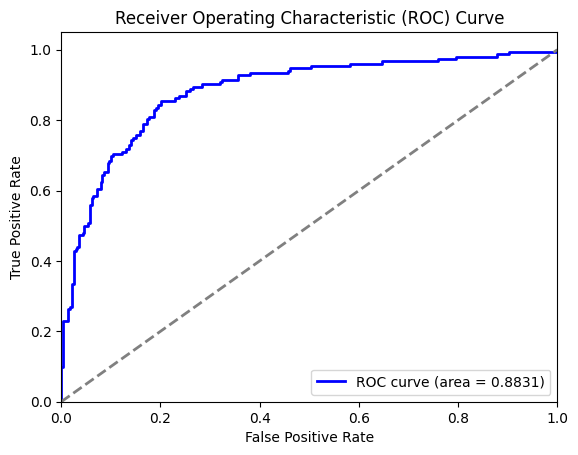

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Assuming you have predictions and actual labels
y_pred = log_reg_model.predict(X_test_scaled)
y_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Optimization

Hyperparameter tuning using 
1. GridSearchCV 
2. RandomizedSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.8400


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(loc=0.01, scale=10),
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the model
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

Best Parameters: {'C': np.float64(0.5908361216819946), 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8400


# Comparison and Visualization 

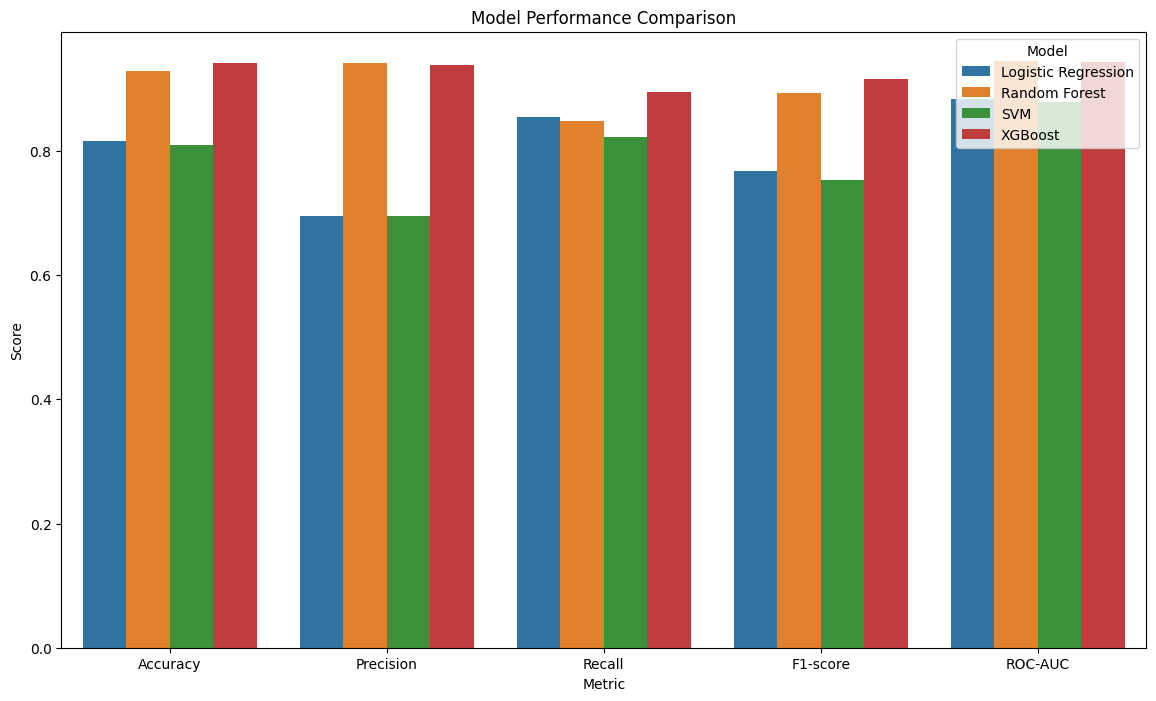

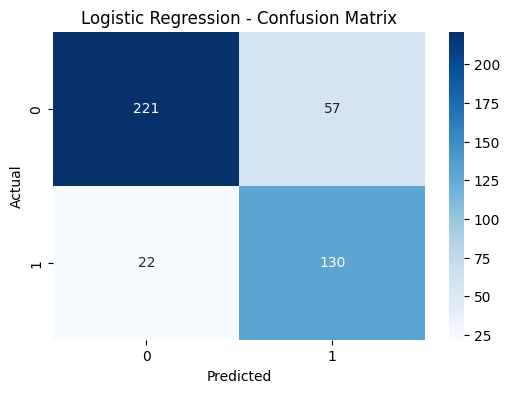

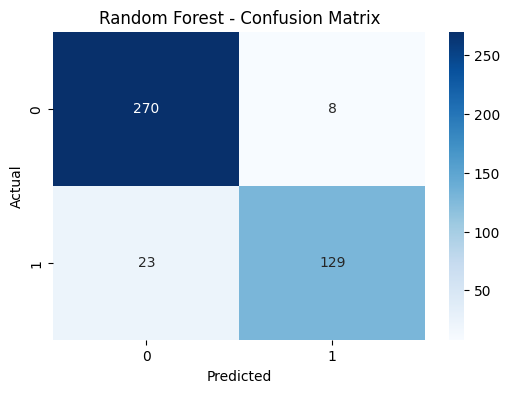

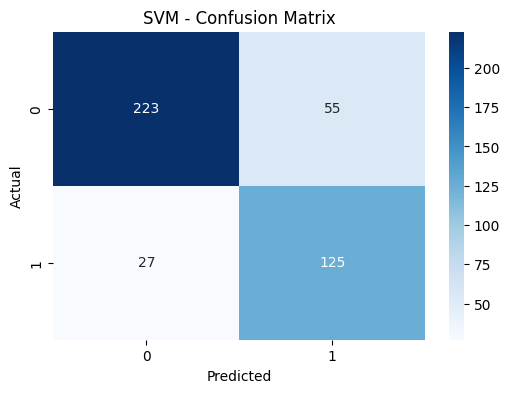

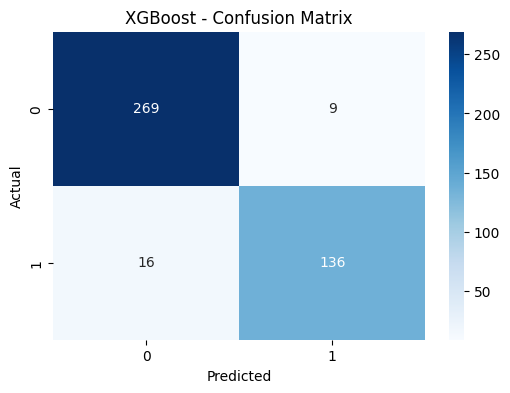

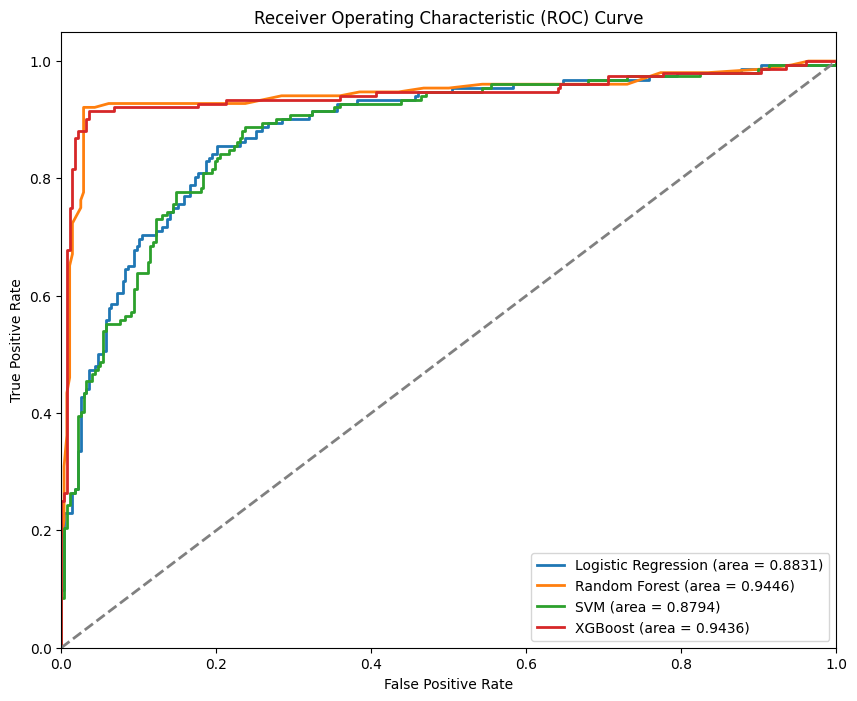

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Assuming you have the true labels and predictions for each model
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
y_preds = {
    'Logistic Regression': log_reg_model.predict(X_test_scaled),
    'Random Forest': rf_model.predict(X_test_scaled),
    'SVM': svm_model.predict(X_test_scaled),
    'XGBoost': xgb_model.predict(X_test_scaled)
}
y_probas = {
    'Logistic Regression': log_reg_model.predict_proba(X_test_scaled)[:, 1],
    'Random Forest': rf_model.predict_proba(X_test_scaled)[:, 1],
    'SVM': svm_model.decision_function(X_test_scaled),
    'XGBoost': xgb_model.predict_proba(X_test_scaled)[:, 1]
}

# Calculate evaluation metrics for each model
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC': []
}

for model in models:
    y_pred = y_preds[model]
    y_proba = y_probas[model]
    
    metrics['Model'].append(model)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-score'].append(f1_score(y_test, y_pred))
    metrics['ROC-AUC'].append(roc_auc_score(y_test, y_proba))

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plot comparison of metrics
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Value'))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()

# Plot confusion matrices for each model
for model in models:
    y_pred = y_preds[model]
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    y_proba = y_probas[model]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, lw=2, label=f'{model} (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
